             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


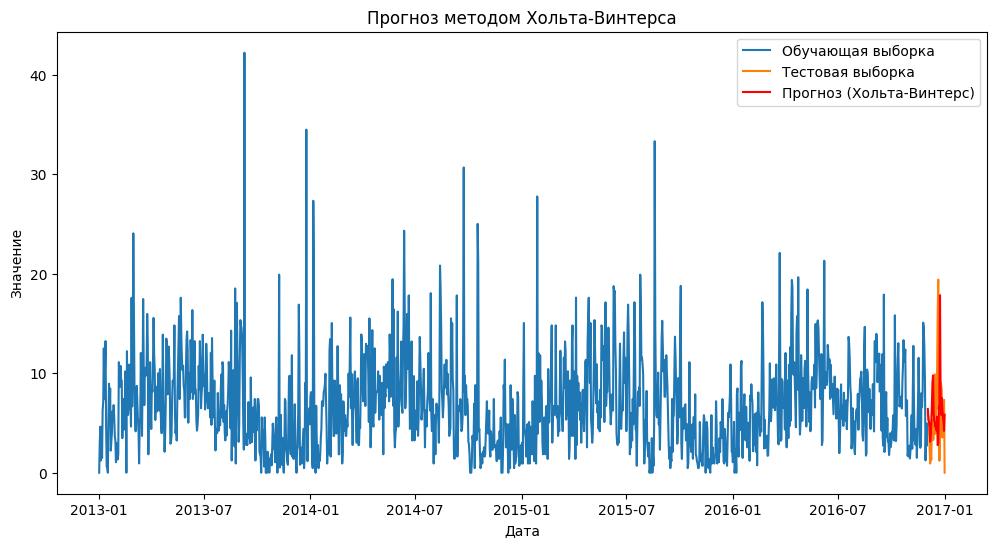

Mean Squared Error (MSE): 28.587547619964916
Root Mean Squared Error (RMSE): 5.346732424571564
R-squared (коэффициент детерминации): -0.6913705043075318


In [16]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Загрузка данных
df = pd.read_csv("DailyDelhiClimateTrain.csv")

# Преобразование столбца с датой в формат datetime
df['date'] = pd.to_datetime(df['date'])

# Установка даты как индекс
df.set_index('date', inplace=True)

# Посмотрим на первые несколько строк данных
print(df.head())

# Разделение данных на обучающую и тестовую выборки
train = df.iloc[:-30]['wind_speed'].values
test = df.iloc[-30:]['wind_speed'].values

# Применение метода Хольта-Винтерса для прогнозирования
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=365).fit()
forecast = model.forecast(steps=len(test))

# Визуализация прогноза и исходных данных
plt.figure(figsize=(12, 6))
plt.plot(df.index[:-30], train, label='Обучающая выборка')
plt.plot(df.index[-30:], test, label='Тестовая выборка')
plt.plot(df.index[-30:], forecast, label='Прогноз (Хольта-Винтерс)', color='red')
plt.title('Прогноз методом Хольта-Винтерса')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

# Расчет среднеквадратичной ошибки (MSE)
mse = np.mean((forecast - test) ** 2)

print("Mean Squared Error (MSE):", mse)

# Расчет корня из MSE (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

# Расчет R-квадрата
r_squared = r2_score(test, forecast)

print("R-squared (коэффициент детерминации):", r_squared)
